In [1]:
# prerequisites
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np

import matplotlib.pyplot as plt

import syft as sy
hook=sy.TorchHook(torch)

Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was '/root/anaconda3/lib/python3.7/site-packages/tf_encrypted/operations/secure_random/secure_random_module_tf_1.15.0.so'


In [2]:
#torch.rand => uniform distribution

dim=100

X1=torch.rand(dim, 1) 
X2=torch.rand(dim,1)

a_1,b_1=5,-1
a_2,b_2=3,2
y1=a_1*X1+b_1+0.5*torch.randn(dim,1)
y2=a_2*X2+b_2+0.5*torch.randn(dim,1)

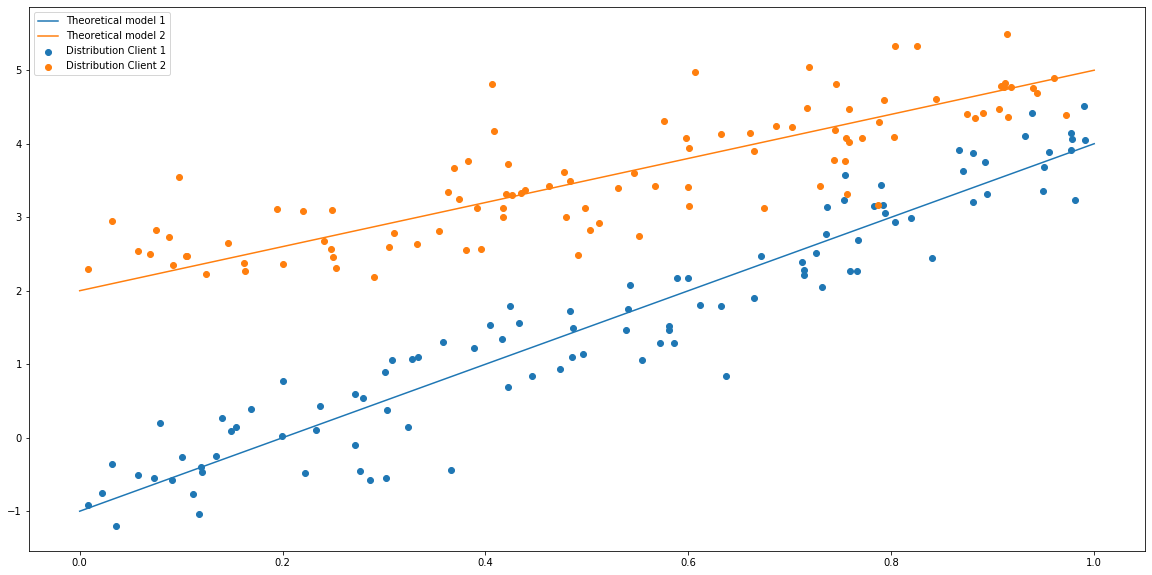

In [3]:
x_axis=np.linspace(0,1,100)

plt.figure(figsize=(20,10))

plt.scatter(X1,y1,label="Distribution Client 1")
plt.plot(x_axis,a_1*x_axis+b_1,label="Theoretical model 1")

plt.scatter(X2,y2,label="Distribution Client 2")
plt.plot(x_axis,a_2*x_axis+b_2,label="Theoretical model 2")

plt.legend()
plt.show()

In [4]:
#Create a simple neural network for the linear regression
class simple_network(nn.Module):
    
    def __init__(self):
        super(simple_network, self).__init__()
        
        self.l1=nn.Linear (1,1)
        
    
    def predict(self,x):
        
        return self.l1(x)        


reg_1=simple_network()
optimizer1=optim.Adam(reg_1.parameters())

reg_2=simple_network()
optimizer2=optim.Adam(reg_2.parameters())

In [5]:
def train_nn(model,optimizer,x,y,epoch):
        optimizer.zero_grad()
        
        y_predict=model.predict(x)

        loss=nn.MSELoss()(y_predict,y)
        
        loss.backward()
        
        optimizer.step() 
        
        if epoch%1000==0:
            
            print("Training MSE for epoch "+str(epoch+1)+": "+ str(loss.item()))

In [6]:
reg_1.state_dict()

OrderedDict([('l1.weight', tensor([[-0.9766]])),
             ('l1.bias', tensor([-0.3479]))])

In [7]:
for epoch in range(10001):
    train_nn(reg_1,optimizer1,X1,y1,epoch)
    train_nn(reg_2,optimizer2,X2,y2,epoch)

Training MSE for epoch 1: 9.146716117858887
Training MSE for epoch 1: 12.517682075500488
Training MSE for epoch 1001: 3.6843903064727783
Training MSE for epoch 1001: 4.771279335021973
Training MSE for epoch 2001: 1.9649964570999146
Training MSE for epoch 2001: 1.459588646888733
Training MSE for epoch 3001: 1.5151997804641724
Training MSE for epoch 3001: 0.4816272258758545
Training MSE for epoch 4001: 1.2012460231781006
Training MSE for epoch 4001: 0.3307017385959625
Training MSE for epoch 5001: 0.8781552314758301
Training MSE for epoch 5001: 0.30366250872612
Training MSE for epoch 6001: 0.5970523357391357
Training MSE for epoch 6001: 0.2785024642944336
Training MSE for epoch 7001: 0.39465832710266113
Training MSE for epoch 7001: 0.25599905848503113
Training MSE for epoch 8001: 0.27708834409713745
Training MSE for epoch 8001: 0.24191081523895264
Training MSE for epoch 9001: 0.22684450447559357
Training MSE for epoch 9001: 0.23681126534938812
Training MSE for epoch 10001: 0.2140807658433

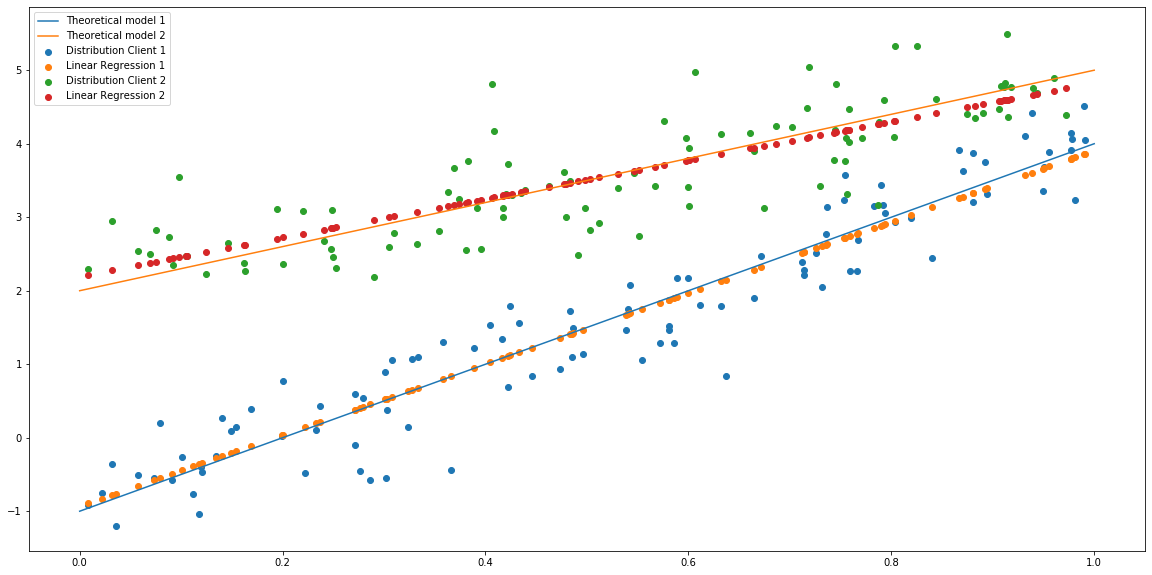

In [8]:
y_pred_1=reg_1.predict(X1).detach()
y_pred_2=reg_2.predict(X2).detach()


x_axis=np.linspace(0,1,100)

plt.figure(figsize=(20,10))

plt.scatter(X1,y1,label="Distribution Client 1")
plt.plot(x_axis,a_1*x_axis+b_1,label="Theoretical model 1")
plt.scatter(X1,y_pred_1,label="Linear Regression 1")

plt.scatter(X2,y2,label="Distribution Client 2")
plt.plot(x_axis,a_2*x_axis+b_2,label="Theoretical model 2")
plt.scatter(X2,y_pred_2,label="Linear Regression 2")

plt.legend()
plt.show()